In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# Reflect the database into a new model
Base = automap_base()

# Reflect the tables
Base.prepare(engine, reflect=True)


/var/folders/_c/0pvwl5014v1b7mmhb37zxl1c0000gn/T/ipykernel_43395/909275078.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [8]:
# View all of the classes that automap found
Base.classes.keys()

# Map the tables to Python classes
Measurement = Base.classes.measurement
Station = Base.classes.station

# List all the classes (tables) reflected from the database
print(Base.classes.keys())

['measurement', 'station']


In [7]:
# Save references to each table


['measurement', 'station']


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).scalar()
print(f"The most recent date in the dataset is: {most_recent_date}")

The most recent date in the dataset is: 2017-08-23


Date one year ago: 2016-08-23 00:00:00


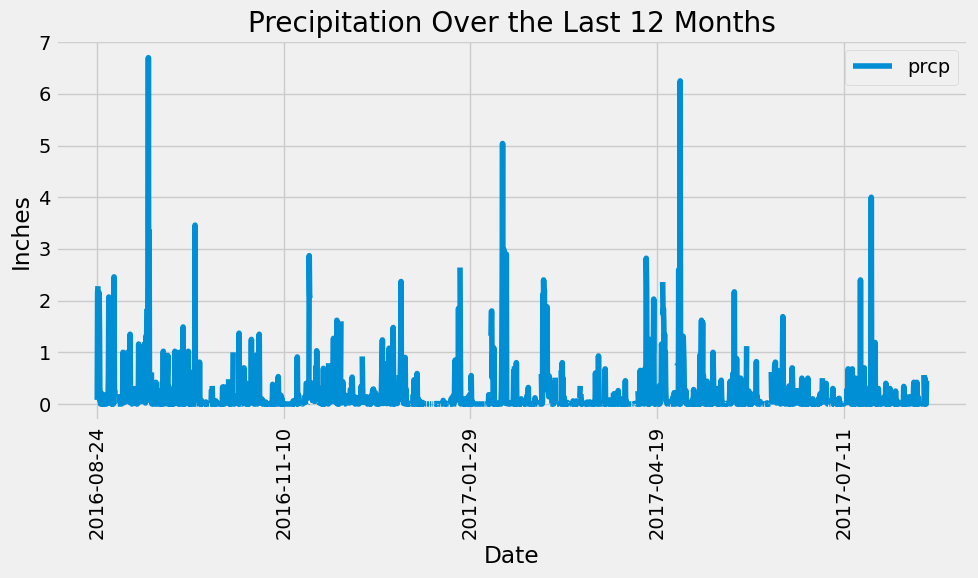

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year ago from the most recent date
one_year_ago = dt.datetime.strptime(most_recent_date, '%Y-%m-%d') - dt.timedelta(days=365)
print(f"Date one year ago: {one_year_ago}")



# Perform a query to retrieve the date and precipitation scores for the last 12 months
precipitation_data = session.query(Measurement.date, Measurement.prcp).\
                     filter(Measurement.date >= one_year_ago).\
                     order_by(Measurement.date).all()



# Save the query results into a Pandas DataFrame and set the column names
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'prcp'])

# Display the first few rows of the DataFrame
precipitation_df.head()



# Sort the DataFrame by date
precipitation_df.sort_values('date', inplace=True)


# Display the sorted DataFrame
precipitation_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
# Plot the precipitation data
precipitation_df.plot(x='date', y='prcp', rot=90, figsize=(10,6))
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation Over the Last 12 Months')
plt.tight_layout()
plt.show()




In [12]:

# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_stats = precipitation_df['prcp'].describe()

# Display the summary statistics
print(precipitation_stats)


count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()

# Print the total number of stations
print(f"Total number of stations: {total_stations}")



Total number of stations: 9


The most active station is: USC00519281


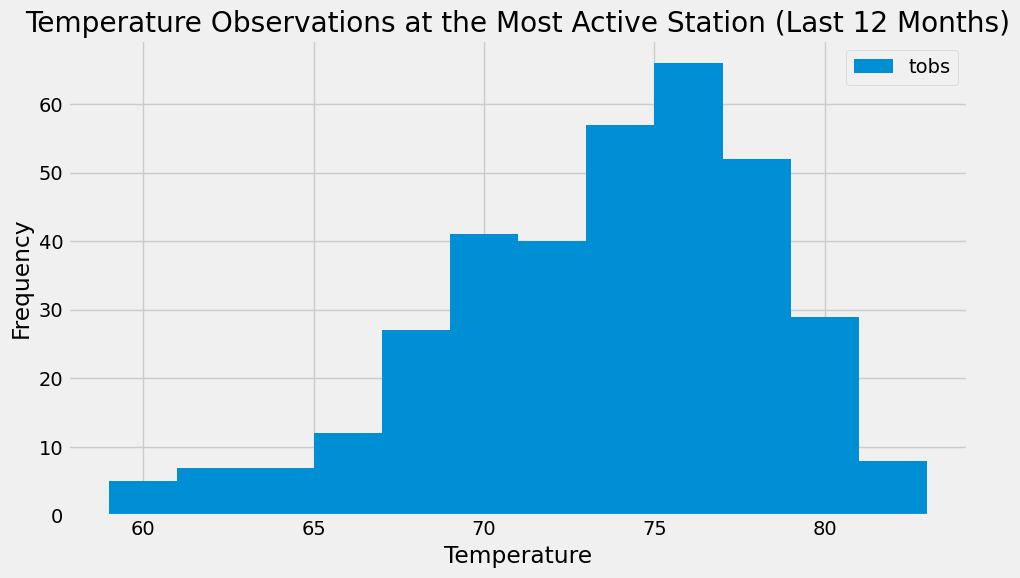

In [14]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#Step 1: Identify the Most Active Station
# Query to find the most-active station
most_active_station = session.query(Measurement.station, func.count(Measurement.station)).\
                      group_by(Measurement.station).\
                      order_by(func.count(Measurement.station).desc()).\
                      first()[0]

print(f"The most active station is: {most_active_station}")

#Step 2: Query the Last 12 Months of Temperature Observation Data
# Query the last 12 months of temperature observation data for the most active station
temperature_data = session.query(Measurement.tobs).\
                  filter(Measurement.station == most_active_station).\
                  filter(Measurement.date >= one_year_ago).all()

# Convert the query results to a Pandas DataFrame
temperature_df = pd.DataFrame(temperature_data, columns=['tobs'])

# Display the first few rows of the DataFrame
temperature_df.head()

#Step 3: Plot the Results as a Histogram
# Plot the results as a histogram
temperature_df.plot.hist(bins=12, figsize=(10,6))
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperature Observations at the Most Active Station (Last 12 Months)')
plt.tight_layout()
plt.show()


# Close Session

In [15]:
# Close Session
session.close()